In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Project Overview
Wildfires cause devastating damage to California’s land and population every summer. Wildfires also contribute significantly to air pollution through the emissions of nitrogen dioxide (NO2), sulfur dioxide (SO2), ozone (O3), and carbon monoxide (CO). This project seeks to illustrate the relationship between air pollution and wildfires within California by observing how wildfires affect the Air Quality Index (AQI) for those four different chemicals. 

To conduct this investigation, we examined an air quality measurement dataset from https://www.kaggle.com/datasets/mexwell/us-air-pollution

**Air Pollution**: Contains air pollution data in U.S. from 2000 to 2016.

The second dataset was collected and reported by CAL FIRE, from https://www.kaggle.com/code/docxian/wildfires-geospatial-visualization-and-eda

**California Wildfires**: Contains data related to wildfires that have occurred in California between 2013 and 2019.

# Load the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Air Pollution Data**

In [ ]:
us_air_pollution = pd.read_csv("/content/drive/MyDrive/uspollution_pollution_us_2000_2016.csv")

In [ ]:
us_air_pollution.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [ ]:
us_air_pollution.dtypes

,0
Unnamed: 0,int64
State Code,int64
County Code,int64
Site Num,int64
Address,object
State,object
County,object
City,object
Date Local,object
NO2 Units,object


In [ ]:
us_air_pollution.shape

(1746661, 29)

**Cali Fire Data**

In [ ]:
cali_fire = pd.read_csv('/content/drive/MyDrive/California_Fire_Incidents.csv')

In [ ]:
cali_fire.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [ ]:
cali_fire.dtypes

,0
AcresBurned,float64
Active,bool
AdminUnit,object
AirTankers,float64
ArchiveYear,int64
CalFireIncident,bool
CanonicalUrl,object
ConditionStatement,object
ControlStatement,object
Counties,object


In [ ]:
cali_fire.shape

(1636, 40)

# Pre-processing the Data

**Air Pollution data**


To handle the missing values in SO2 and CO AQI’s columns, we creat four AQI columns by taking an average of the multiple daily measurements, overcoming the issue as there wasn’t an instance where all daily measurements were missing for any of the pollutants.

Then we filter results only by California, index by date and county, and drop all columns except our average daily AQI for each pollutant.

In [ ]:
cali_air_pollution = us_air_pollution[us_air_pollution['State'] == 'California']
## convert date column to datetime type & rename the column
cali_air_pollution['Date Local'] = pd.to_datetime(cali_air_pollution['Date Local'])
cali_air_pollution.rename(columns={'Date Local':'Date'}, inplace=True)
merged_air_pollution = cali_air_pollution.copy()

## drop all non relevant columns
aqi_columns = [col for col in merged_air_pollution.columns if 'AQI' in col]
columns_to_keep = aqi_columns + ['Date', 'County', 'City']
merged_air_pollution = merged_air_pollution[columns_to_keep]

## calculate daily average aqi for each chemical
merged_air_pollution = merged_air_pollution[merged_air_pollution['Date'] >= '2013-01-01']
merged_air_pollution_condensed = merged_air_pollution.groupby(['Date', 'County'], as_index=False).agg({'NO2 AQI':'mean','O3 AQI':'mean', 'SO2 AQI':'mean','CO AQI':'mean'})

print(merged_air_pollution_condensed.head())

last_date = merged_air_pollution_condensed['Date'].max()

print("Last date in the dataset:", last_date)


merged_air_pollution_condensed

<ipython-input-11-17963ff5ad6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cali_air_pollution['Date Local'] = pd.to_datetime(cali_air_pollution['Date Local'])
<ipython-input-11-17963ff5ad6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cali_air_pollution.rename(columns={'Date Local':'Date'}, inplace=True)


        Date        County  NO2 AQI  O3 AQI   SO2 AQI     CO AQI
0 2013-01-01       Alameda     28.0    27.0  0.000000   8.000000
1 2013-01-01  Contra Costa     22.0    28.0  0.333333   6.333333
2 2013-01-01        Fresno     24.0    23.0  0.000000  14.000000
3 2013-01-01      Humboldt      6.0    22.0  0.000000   6.000000
4 2013-01-01      Imperial     38.0    31.0  3.000000  54.000000
Last date in the dataset: 2016-04-30 00:00:00


,Date,County,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2013-01-01,Alameda,28.0,27.000000,0.000000,8.000000
1,2013-01-01,Contra Costa,22.0,28.000000,0.333333,6.333333
2,2013-01-01,Fresno,24.0,23.000000,0.000000,14.000000
3,2013-01-01,Humboldt,6.0,22.000000,0.000000,6.000000
4,2013-01-01,Imperial,38.0,31.000000,3.000000,54.000000
...,...,...,...,...,...,...
15691,2016-04-29,Solano,8.0,35.000000,0.000000,3.000000
15692,2016-04-30,Alameda,23.0,36.000000,1.000000,6.000000
15693,2016-04-30,Contra Costa,6.0,37.666667,0.666667,3.666667
15694,2016-04-30,Santa Clara,23.0,40.000000,0.000000,3.000000


**Cali Fire data**

For the cali fire dataset, we calculate a fire “endurance” column to track the duration of fires and index it by date.
We then filter out dates that don’t exist in the air pollution dataset (those that were larger than 2016) .

In [ ]:
## convert date column to datetime type & rename the column
merged_cali_fire = cali_fire.copy()
merged_cali_fire['Started'] = merged_cali_fire['Started'].str.split('T').str[0]
merged_cali_fire['Started'] = pd.to_datetime(merged_cali_fire['Started'])
merged_cali_fire['Extinguished'] = merged_cali_fire['Extinguished'].str.split('T').str[0]
merged_cali_fire['Extinguished'] = pd.to_datetime(merged_cali_fire['Extinguished'])
merged_cali_fire.rename(columns={'Started': 'Date', 'Counties': 'County'}, inplace=True)

## add a column called endurance for how long the fire last
## column kept: Date，County, Endurance, AcresBurned
merged_cali_fire['Endurance'] = merged_cali_fire['Extinguished'] - merged_cali_fire['Date']
merged_cali_fire['Endurance'] = merged_cali_fire['Endurance'].dt.days
merged_cali_fire = merged_cali_fire[['Date', 'County', 'Endurance', 'AcresBurned']]
merged_cali_fire.head()

merged_cali_fire.shape  # REMVE 3 ROWS THAT HAVE MISSING VALUES FOR ACRES BURNED
                        # SO THAT WE CAN ASSUME IMMEDIATELY LATER ON THAT IF ACRES BURNED = NaN
                        # THAT MEANS THERE WAS NO FIRE THERE.
                        # BECAUSE IT'S ONLY 3 ROWS, this removal won't have a huge impact

merged_cali_fire = merged_cali_fire.dropna(subset=['AcresBurned'])


In [ ]:
## preparation for data merging: limit date range within 2013-2016
merged_cali_fire = merged_cali_fire[(merged_cali_fire['Date'] >= merged_air_pollution['Date'].min()) & (merged_cali_fire['Date'] <= merged_air_pollution['Date'].max())]
merged_air_pollution = merged_air_pollution[(merged_air_pollution['Date'] >= merged_cali_fire['Date'].min()) & (merged_air_pollution['Date'] <= merged_cali_fire['Date'].max())]

# Merge Two Datasets

We merge the two datasets on dates and county

In [ ]:
cali_fire_aqi = pd.merge(merged_air_pollution_condensed, merged_cali_fire, on=['Date', 'County'], how='left')
cali_fire_aqi.sort_values(by=['County', 'Date'], inplace=True)

aqi_columns = aqi_columns[:4]
aqi_mean = cali_fire_aqi[aqi_columns].mean()
aqi_std = cali_fire_aqi[aqi_columns].std()

for column in aqi_columns:
  cali_fire_aqi[column +'_standardized'] = (cali_fire_aqi[column] - aqi_mean[column]) / aqi_std[column]

for column in aqi_columns:
  cali_fire_aqi[column + '_previous_day'] = cali_fire_aqi.groupby('County')[column].shift(1)


cali_fire_aqi

,Date,County,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Endurance,AcresBurned,NO2 AQI_standardized,O3 AQI_standardized,SO2 AQI_standardized,CO AQI_standardized,NO2 AQI_previous_day,O3 AQI_previous_day,SO2 AQI_previous_day,CO AQI_previous_day
0,2013-01-01,Alameda,28.0,27.0,0.0,8.0,NaN,NaN,0.600970,-0.563478,-0.492318,0.508357,NaN,NaN,NaN,NaN
13,2013-01-02,Alameda,37.0,8.0,6.0,16.0,NaN,NaN,1.270120,-1.410858,2.031580,2.292708,28.0,27.0,0.0,8.0
26,2013-01-03,Alameda,42.0,8.0,3.0,23.0,NaN,NaN,1.641870,-1.410858,0.769631,3.854016,37.0,8.0,6.0,16.0
40,2013-01-04,Alameda,35.0,12.0,3.0,16.0,NaN,NaN,1.121420,-1.232462,0.769631,2.292708,42.0,8.0,3.0,23.0
54,2013-01-05,Alameda,28.0,19.0,3.0,18.0,NaN,NaN,0.600970,-0.920269,0.769631,2.738796,35.0,12.0,3.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15684,2016-04-26,Solano,8.0,37.0,1.0,2.0,NaN,NaN,-0.886031,-0.117489,-0.071668,-0.829906,2.0,37.0,0.0,2.0
15688,2016-04-27,Solano,5.0,39.0,0.0,3.0,NaN,NaN,-1.109081,-0.028291,-0.492318,-0.606862,8.0,37.0,1.0,2.0
15692,2016-04-28,Solano,6.0,34.0,0.0,2.0,NaN,NaN,-1.034731,-0.251286,-0.492318,-0.829906,5.0,39.0,0.0,3.0
15696,2016-04-29,Solano,8.0,35.0,0.0,3.0,NaN,NaN,-0.886031,-0.206687,-0.492318,-0.606862,6.0,34.0,0.0,2.0


# Analyze the Data

In [ ]:
cali_fire_aqi['DayBeforeFire'] = cali_fire_aqi['Date'] - pd.Timedelta(days=1)

# Merge the datasets on 'County' and 'DayBeforeFire' (shifted date)
merged_data_day_before = pd.merge(cali_fire_aqi, merged_air_pollution_condensed, left_on=['County', 'DayBeforeFire'], right_on=['County', 'Date'], how='inner')

# Filter the dataset to include only rows where fire occurred (e.g., 'AcresBurned' > 0)
fire_days_before = merged_data_day_before[merged_data_day_before['AcresBurned'] > 0]
fire_days = cali_fire_aqi[cali_fire_aqi['AcresBurned'] > 0]


# Calculate the mean of the 'SO2' column for the day before the fire
mean_o3_before_fire = fire_days_before['O3 AQI_previous_day'].mean()
mean_o3_on_fire = fire_days['O3 AQI'].mean()
print(mean_o3_before_fire)
print(mean_o3_on_fire)
fire_days

58.754999999999995
59.035


,Date,County,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Endurance,AcresBurned,NO2 AQI_standardized,O3 AQI_standardized,SO2 AQI_standardized,CO AQI_standardized,NO2 AQI_previous_day,O3 AQI_previous_day,SO2 AQI_previous_day,CO AQI_previous_day,DayBeforeFire
2073,2013-06-08,Alameda,11.0,28.0,0.0,3.0,0.0,240.0,-0.662981,-0.518879,-0.492318,-0.606862,21.0,20.0,0.0,5.0,2013-06-07
2439,2013-07-04,Alameda,17.0,22.0,3.0,3.0,0.0,50.0,-0.216881,-0.786473,0.769631,-0.606862,14.0,18.0,7.0,3.0,2013-07-03
2467,2013-07-06,Alameda,11.0,22.0,0.0,2.0,0.0,38.0,-0.662981,-0.786473,-0.492318,-0.829906,6.0,20.0,0.0,2.0,2013-07-05
3682,2013-10-04,Alameda,40.0,35.0,1.0,9.0,0.0,150.0,1.493170,-0.206687,-0.071668,0.731401,21.0,25.0,1.0,6.0,2013-10-03
11813,2015-05-28,Alameda,9.0,26.0,0.0,5.0,0.0,242.0,-0.811681,-0.608077,-0.492318,-0.160774,9.0,26.0,0.0,5.0,2015-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,2013-06-10,Solano,5.0,30.0,0.0,3.0,4.0,28.0,-1.109081,-0.429681,-0.492318,-0.606862,2.0,31.0,0.0,3.0,2013-06-09
2227,2013-06-18,Solano,5.0,25.0,0.0,2.0,0.0,124.0,-1.109081,-0.652676,-0.492318,-0.829906,6.0,21.0,0.0,2.0,2013-06-17
7000,2014-06-12,Solano,3.0,25.0,0.0,2.0,1.0,70.0,-1.257781,-0.652676,-0.492318,-0.829906,3.0,29.0,0.0,2.0,2014-06-11
12352,2015-07-06,Solano,4.0,30.0,0.0,3.0,2.0,150.0,-1.183431,-0.429681,-0.492318,-0.606862,3.0,25.0,0.0,3.0,2015-07-05


The main plot that we created analyzed the AQI levels for each pollutant included in the dataset, plotted against time, with the fire events marked with a vertical line to mark where it starts and a corresponding horizontal line to track the duration.

We plotted the top 5 counties with the biggest number of fires, but as Riverside had by far the highest volume of fire, we focused on it in our analysis.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

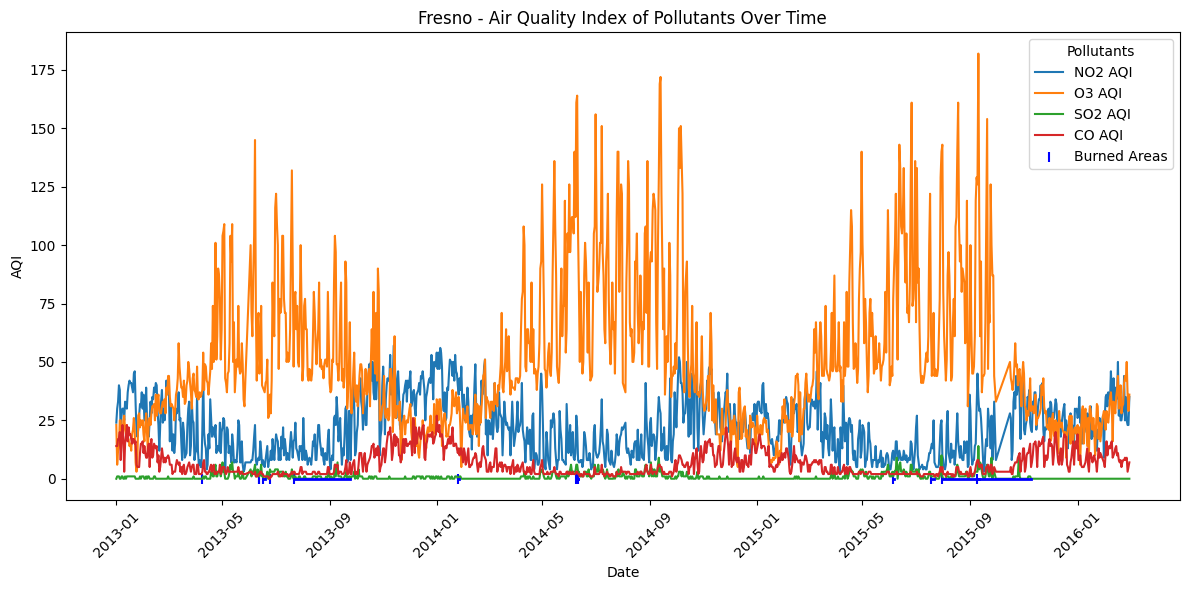

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

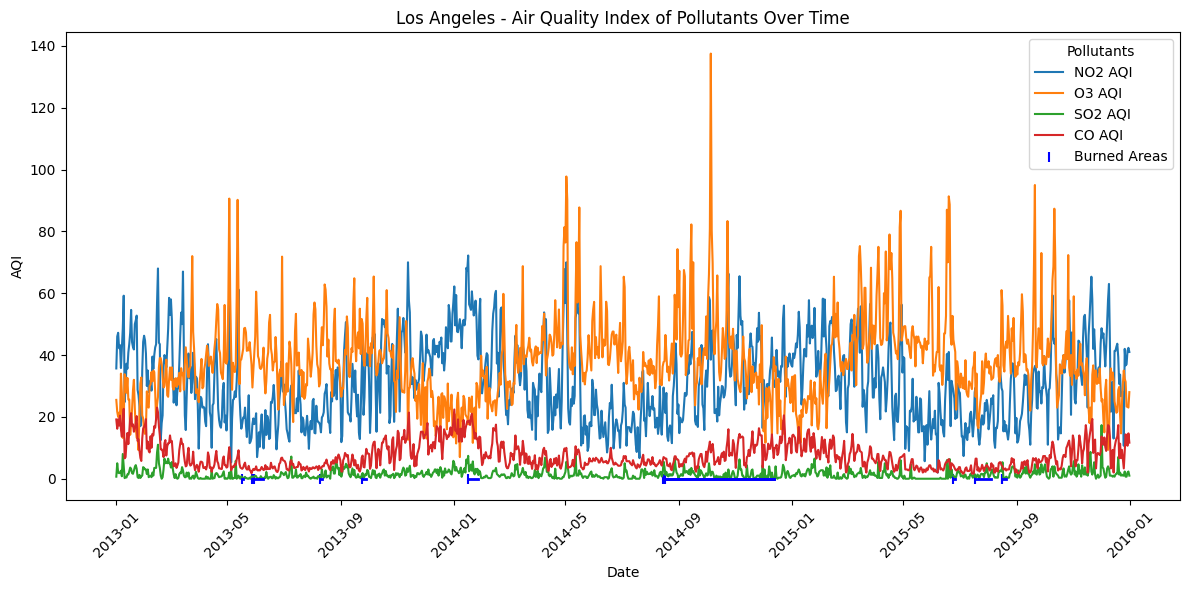

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

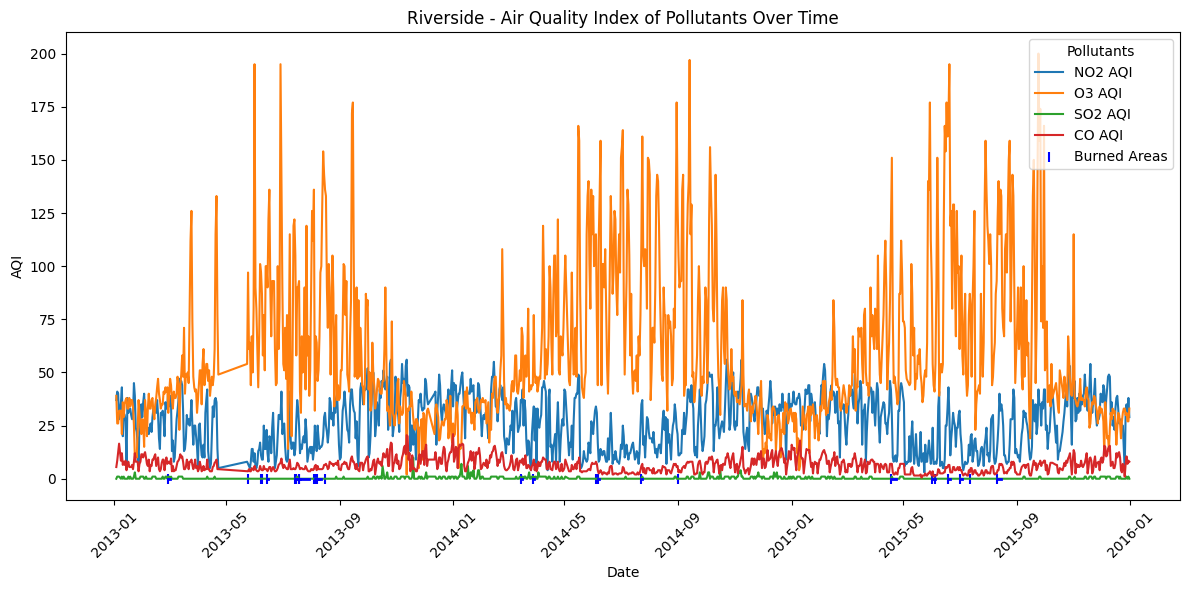

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

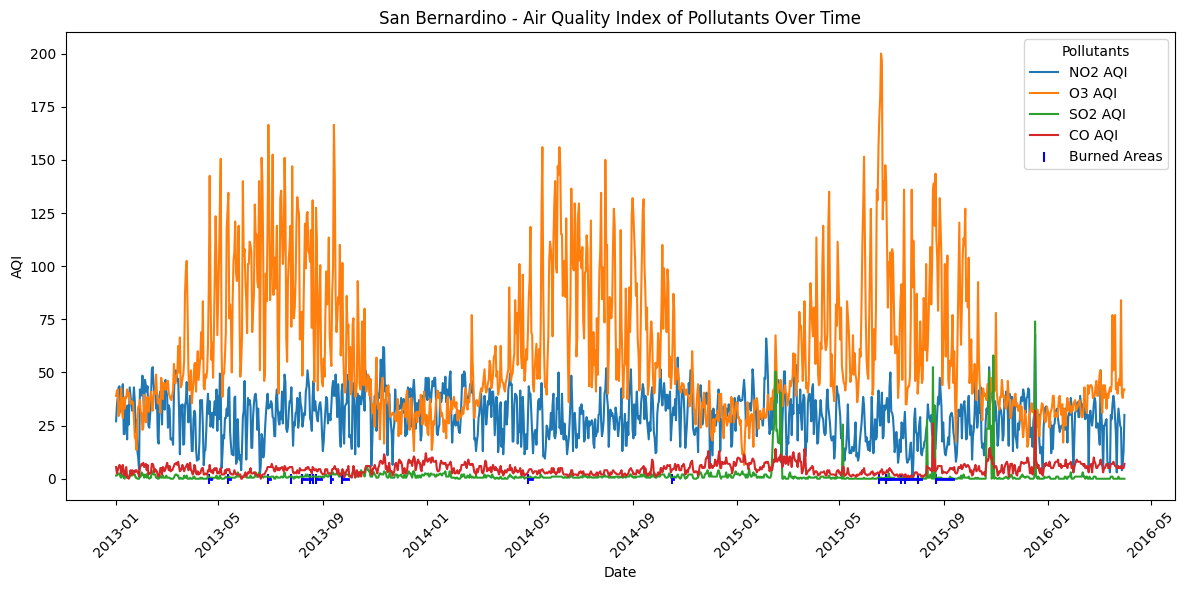

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

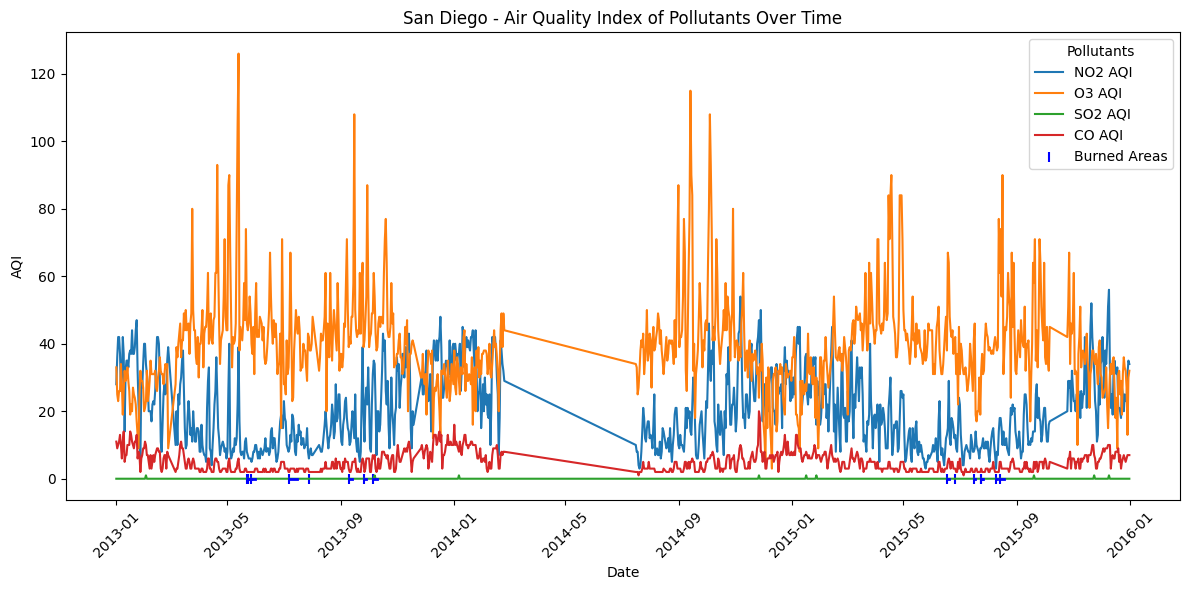

In [ ]:
fires = cali_fire_aqi.dropna(subset=['AcresBurned'])
fire_count_by_county = fires.groupby('County').size().reset_index(name='FireCount')
top_5_counties = fire_count_by_county.sort_values(by='FireCount', ascending=False).head(5)['County']
top_5_counties_df = cali_fire_aqi[cali_fire_aqi['County'].isin(top_5_counties)]
unique_top_5_counties = top_5_counties_df['County'].unique()



## choose the most interesting count
for county in unique_top_5_counties:
  county_data = cali_fire_aqi[cali_fire_aqi['County'] == county]
  melted_data = county_data.melt(id_vars=['Date', 'AcresBurned'],
                                    value_vars=['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI'],
                                    var_name='Pollutant',
                                    value_name='AQI')

  # Create the plot
  plt.figure(figsize=(12, 6))
  sns.lineplot(data=melted_data, x='Date', y='AQI', hue='Pollutant', palette='tab10')

  # Mark dates with non-NaN AcresBurned values
  acres_burned_dates = county_data[county_data['AcresBurned'].notna()]['Date']
  plt.scatter(acres_burned_dates, [0] * len(acres_burned_dates),
              color='blue', marker='|', s=50, label='Burned Areas')

  # Also add the fire duration lines to the plot
  for idx, row in county_data[county_data['AcresBurned'].notna()].iterrows():
      # Calculate the extinguished date by adding endurance to the start date
      end_date = row['Date'] + pd.to_timedelta(row['Endurance'], unit='D')
      # Draw a horizontal line showing the duration of the fire
      plt.plot([row['Date'], end_date], [0, 0], color='blue', lw=2)

  # Customize the plot
  plt.title(f'{county} - Air Quality Index of Pollutants Over Time')
  plt.xlabel('Date')
  plt.ylabel('AQI')
  plt.legend(title='Pollutants', loc='upper right')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()

  # Show the plot
  plt.show()


On Riverside's graph, we see significant spikes in O3 AQI right after fires occurred. At the same time, we see that it is only the O3 AQI out of the four that displays any clear relationship with wildfire season and events.

To support this, we created a new column to track AQI changes from day to day and plotted that against time. For readability, we isolated the plot to just 2013 Riverside to examine the wildfire season.

In [ ]:
def calculate_aqi_change(df):
    # Calculate the difference between the current AQI and the AQI from the previous day for each pollutant
    df['NO2_AQI_change'] = df['NO2 AQI'] - df['NO2 AQI_previous_day']
    df['O3_AQI_change'] = df['O3 AQI'] - df['O3 AQI_previous_day']
    df['SO2_AQI_change'] = df['SO2 AQI'] - df['SO2 AQI_previous_day']
    df['CO_AQI_change'] = df['CO AQI'] - df['CO AQI_previous_day']

    return df


cali_fire_aqi = calculate_aqi_change(cali_fire_aqi)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

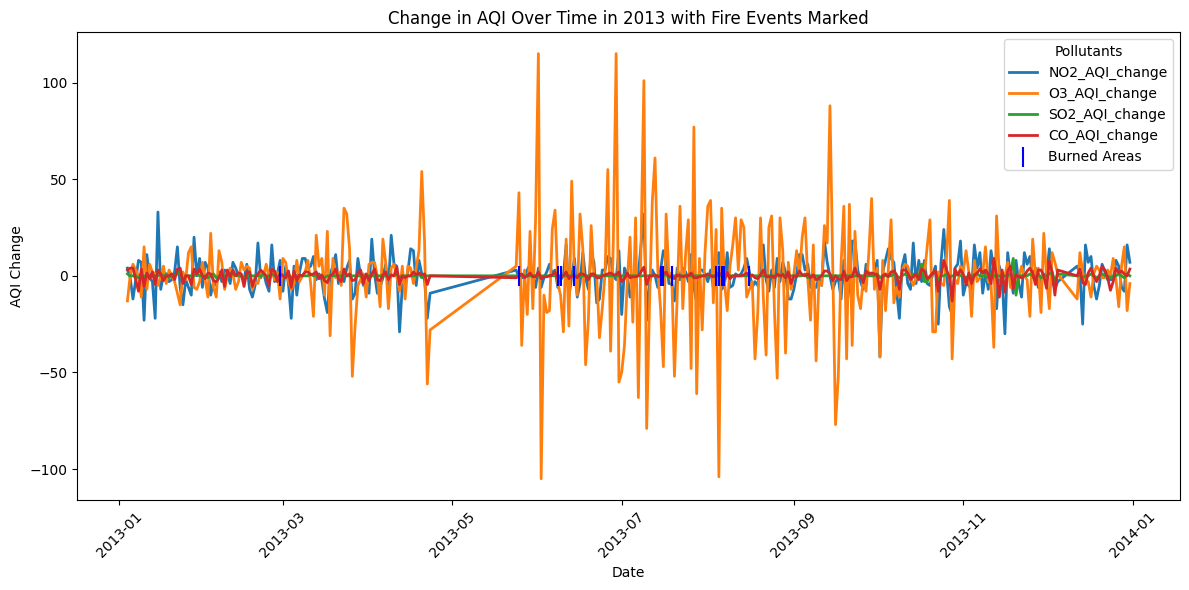

In [ ]:
# Filter the DataFrame for data from the year 2013 for Riverside
cali_fire_aqi_2013_riverside = cali_fire_aqi[cali_fire_aqi['Date'].dt.year == 2013].copy()
cali_fire_aqi_2013_riverside = cali_fire_aqi_2013_riverside[cali_fire_aqi_2013_riverside['County'] == 'Riverside']

# Melt to long format
melted_aqi_changes_2013 = cali_fire_aqi_2013_riverside.melt(id_vars=['Date'],
                                                  value_vars=['NO2_AQI_change', 'O3_AQI_change', 'SO2_AQI_change', 'CO_AQI_change'],
                                                  var_name='Pollutant',
                                                  value_name='AQI_Change')

# AQI changes over time for 2013 data
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_aqi_changes_2013, x='Date', y='AQI_Change', hue='Pollutant', palette='tab10', linewidth=2)

# Mark fire events on the plot using blue vertical lines for 2013 data
acres_burned_dates_2013 = cali_fire_aqi_2013_riverside[cali_fire_aqi_2013_riverside['AcresBurned'].notna()]['Date']


plt.scatter(acres_burned_dates_2013, [0] * len(acres_burned_dates_2013),  # Y-values are 0 to align fire events at AQI_Change = 0
            color='blue', marker='|', s=200, label='Burned Areas', zorder=3)  # zorder=3 to bring markers to front


plt.title('Change in AQI Over Time in 2013 with Fire Events Marked')
plt.xlabel('Date')
plt.ylabel('AQI Change')
plt.xticks(rotation=45)
plt.legend(title='Pollutants', loc='upper right')

plt.tight_layout()
plt.show()

From the graph, we can observe that the fires create massive swings in O3 AQI daily change. It shoots rapidly up, and then rapidly down almost immediately as the fire gets extinguished. 

In [ ]:

# Create 'Extinguish Date'
cali_fire_aqi_riverside = cali_fire_aqi[cali_fire_aqi['County'] == 'Riverside']
cali_fire_aqi_riverside['Extinguish Date'] = cali_fire_aqi_riverside['Date'] + pd.to_timedelta(cali_fire_aqi_riverside['Endurance'], unit='D')


fire_data = cali_fire_aqi_riverside[cali_fire_aqi_riverside['AcresBurned'].notna() & cali_fire_aqi_riverside['Endurance'].notna()]

# AQI Diff to check lingering effects
def calculate_aqi_diff(row, pollutant):
    start_aqi = row[f'{pollutant} AQI']

    # AQI on extinguish date (Date + Endurance)
    extinguish_aqi = fire_data.loc[fire_data['Date'] == row['Extinguish Date'], f'{pollutant} AQI']

    if not extinguish_aqi.empty:
        return np.abs(start_aqi - extinguish_aqi.values[0])
    else:
        return np.nan

# Apply the function to calculate the absolute AQI difference for each pollutant
fire_data['NO2_AQI_abs_diff'] = fire_data.apply(calculate_aqi_diff, axis=1, pollutant='NO2')
fire_data['O3_AQI_abs_diff'] = fire_data.apply(calculate_aqi_diff, axis=1, pollutant='O3')
fire_data['SO2_AQI_abs_diff'] = fire_data.apply(calculate_aqi_diff, axis=1, pollutant='SO2')
fire_data['CO_AQI_abs_diff'] = fire_data.apply(calculate_aqi_diff, axis=1, pollutant='CO')

# Now calculate the average absolute difference for each pollutant across all fires
avg_NO2_AQI_diff = fire_data['NO2_AQI_abs_diff'].mean()
avg_O3_AQI_diff = fire_data['O3_AQI_abs_diff'].mean()
avg_SO2_AQI_diff = fire_data['SO2_AQI_abs_diff'].mean()
avg_CO_AQI_diff = fire_data['CO_AQI_abs_diff'].mean()

# Print the results
print(f"Average Absolute AQI Difference from Start to Extinguish (O3): {avg_O3_AQI_diff:.2f}")

Average Absolute AQI Difference from Start to Extinguish (O3): 3.55


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
<ipython-input-19-191064f94baf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cali_fire_aqi_riverside['Extinguish Date'] = cali_fire_aqi_riverside['Date'] + pd.to_timedelta(cali_fire_aqi_riverside['Endurance'], unit='D')
<ipython-input-19-191064f94baf>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data['NO2_AQI_abs_diff'] = fire_data.apply(calculate

One observation that we noticed was that the AQI effects per fire seem to be short-lived, as all the sharp upticks are immediately followed by a rapid negative AQI change. After running a short calculation where we calculate the average absolute difference between the post-extinguish AQI and the start AQI, we see that O3 only changes by 3.55 on average for each fire.